# Introducción

En el competitivo mundo de la venta de entradas para eventos, la asignación eficiente del presupuesto de marketing es crucial para maximizar el retorno de la inversión (ROI). Este informe presenta un análisis detallado de los datos de visitas, pedidos y gastos de marketing de Showz durante el período de enero de 2017 a diciembre de 2018. 

El objetivo es identificar las plataformas y estrategias más efectivas para la inversión en marketing, con el fin de impulsar las ventas y aumentar la visibilidad de la marca. A través de un enfoque centrado en métricas clave, se han evaluado diferentes canales de marketing digital para determinar cuáles ofrecen el mejor rendimiento y justificación de gasto. 

Las recomendaciones que se presentan a continuación están fundamentadas en un análisis cuidadoso de las métricas de rendimiento, como la tasa de conversión, el costo por adquisición y el engagement, con el objetivo de proporcionar a los expertos de marketing estrategias claras y accionables que faciliten la optimización de sus inversiones publicitarias.

# Descripción de los datos

**La tabla visits (registros del servidor con datos sobre las visitas al sitio web):**

Uid: identificador único del usuario.
Device: dispositivo del usuario.
Start Ts: fecha y hora de inicio de la sesión.
End Ts: fecha y hora de término de la sesión.
Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
Todas las fechas de esta tabla están en formato AAAA-MM-DD.

**La tabla orders (datos sobre pedidos):**

Uid: identificador único del usuario que realiza un pedido.
Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

**La tabla costs (datos sobre gastos de marketing):**

source_id: identificador de la fuente de anuncios.
dt: fecha.
costs: gastos en esta fuente de anuncios en este día.

odas las fechas de esta tabla están en formato AAAA-MM-DD.




## Paso 1: Acceso y preparación de los datos

En este primer paso, accedimos y preparamos los datos para asegurar que estén listos para el análisis posterior. A continuación se detallan las acciones realizadas:

### Carga de los datos

Se cargaron tres conjuntos de datos provenientes de archivos CSV. Estos archivos contienen información sobre las visitas al sitio web, los pedidos realizados y los gastos en marketing. Cada archivo se almacenó en variables correspondientes para poder trabajar con ellos en las siguientes etapas.

### Verificación de los tipos de datos

Posteriormente, se verificaron los tipos de datos en las columnas, prestando especial atención a las columnas de fechas y horas, ya que son cruciales para calcular métricas como la duración de las sesiones o el tiempo que transcurre entre el registro y la primera compra.

### Conversión de formatos de fecha y hora

En algunos casos, las columnas que contenían fechas y horas estaban almacenadas como cadenas de texto (strings), lo que requería su conversión al formato de fecha y hora adecuado. Esta conversión permite realizar cálculos y análisis temporales de manera correcta, como determinar la duración de una sesión o analizar las tendencias a lo largo del tiempo.

### Manejo de valores no válidos

Durante la conversión, se identificaron posibles valores no válidos o erróneos en las columnas de fechas. Estos valores se manejaron eliminando las filas correspondientes para evitar errores en los cálculos posteriores y asegurar que el análisis se realice solo con datos confiables.

### Cálculo de la duración de las sesiones

Una vez convertidos los datos de fechas, se procedió a calcular la duración de cada sesión restando la hora de inicio de la sesión de la hora de finalización. Esta nueva métrica es crucial para entender el comportamiento de los usuarios, como el tiempo que pasan en el sitio web en cada visita.

In [1]:
# Importa las librerías necesarias
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta de los archivos CSV
visits_path = '/datasets/visits_log_us.csv'
orders_path = '/datasets/orders_log_us.csv'
costs_path = '/datasets/costs_us.csv'

In [2]:
# Cargar los datasets
visits = pd.read_csv(visits_path)
orders = pd.read_csv(orders_path)
costs = pd.read_csv(costs_path)

# Revisión rápida de los datasets
print("Data set visits")
print(visits.head())
print('')
print("Data set orders")
print(orders.head())
print('')
print("Data set costs")
print(costs.head())


Data set visits
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

Data set orders
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Data set costs
   source_id          dt  costs
0          1  2017-06-01  75.20
1   

In [3]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

# Revisión rápida de los datos después de la transformación
print(visits.head())

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [4]:
visits['session_duration'] = visits['End Ts'] - visits['Start Ts']
print(visits.head())

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid session_duration  
0  16879256277535980062  0 days 00:18:00  
1    104060357244891740  0 days 00:28:00  
2   7459035603376831527  0 days 00:00:00  
3  16174680259334210214  0 days 00:24:00  
4   9969694820036681168  0 days 00:00:00  


In [5]:
# Verificar si hay valores faltantes en los datasets
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())

Device              0
End Ts              0
Source Id           0
Start Ts            0
Uid                 0
session_duration    0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


## Paso 2: Informes y cálculo de métricas

En este segundo paso, se realizó un análisis detallado de los datos cargados, con el objetivo de calcular diversas métricas relevantes para optimizar los gastos de marketing. A continuación se describen las principales acciones realizadas:

### Análisis de visitas

1. **Usuarios diarios, semanales y mensuales**: Se calculó el número de usuarios únicos que visitaron el sitio web en diferentes intervalos de tiempo. Esto permite identificar patrones de uso y determinar en qué momentos hay más tráfico.

2. **Sesiones por día**: Se contabilizó la cantidad de sesiones generadas por día. Es importante resaltar que un solo usuario puede tener múltiples sesiones, lo que ayuda a entender mejor el comportamiento de los usuarios.

3. **Duración de cada sesión**: Se analizó la duración promedio de las sesiones para evaluar el compromiso de los usuarios con el contenido del sitio. Este análisis proporciona información sobre cuánto tiempo los usuarios están dispuestos a invertir en la plataforma.

4. **Frecuencia de regreso de los usuarios**: Se estudió cuántos usuarios regresan al sitio web después de su primera visita. Esta métrica es clave para determinar la lealtad de los usuarios y la efectividad de las estrategias de retención.

### Análisis de ventas

1. **Inicio de las compras**: Se determinó cuándo comienzan los usuarios a realizar compras. Se analizó el tiempo que transcurre entre el registro de un usuario y su primera compra, categorizando a los usuarios en diferentes grupos de conversión.

2. **Número de pedidos en un período**: Se contó cuántos pedidos se realizaron durante distintos períodos de tiempo. Esto ayuda a entender la demanda del servicio y a planificar mejor la estrategia de marketing.

3. **Tamaño promedio de compra**: Se calculó el valor medio de las compras realizadas por los usuarios. Este dato es crucial para conocer el comportamiento de gasto de los clientes y ajustar las ofertas.

4. **Valor de tiempo de vida del cliente (LTV)**: Se estimó cuánto dinero aporta, en promedio, cada cliente a la compañía a lo largo de su relación con Showz. Esto permite evaluar el retorno de la inversión en marketing y adquisiciones.

### Análisis de marketing

1. **Gastos totales y desglose por fuente**: Se analizó cuánto dinero se gastó en marketing, tanto en total como desglosado por cada fuente de adquisición. Este análisis permite identificar cuáles fuentes son más efectivas en términos de retorno de la inversión.

2. **Costo de adquisición de clientes (CAC)**: Se calculó el CAC para cada fuente de marketing. Esto ayuda a entender la eficiencia de cada canal en la adquisición de nuevos clientes.

3. **Rentabilidad de las inversiones (ROMI)**: Se evaluó cuán rentables fueron las inversiones en marketing a través del cálculo del ROMI. Esta métrica es esencial para decidir dónde enfocar los esfuerzos de marketing en el futuro.

### Visualización de datos

Para complementar el análisis, se trazaron gráficos que muestran cómo varían estas métricas a través de diferentes dispositivos y fuentes de anuncios, así como su evolución a lo largo del tiempo. Las visualizaciones permiten comunicar los hallazgos de manera clara y efectiva.

**ANALISIS DE VISITAS**

In [6]:
# Calcular usuarios únicos por día
daily_users = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()
daily_users.columns = ['Date', 'Unique Users']

# Calcular usuarios únicos por semana
daily_users['Week'] = pd.to_datetime(daily_users['Date']).dt.to_period('W').astype(str)
weekly_users = daily_users.groupby('Week')['Unique Users'].sum().reset_index()

# Calcular usuarios únicos por mes
daily_users['Month'] = pd.to_datetime(daily_users['Date']).dt.to_period('M').astype(str)
monthly_users = daily_users.groupby('Month')['Unique Users'].sum().reset_index()

print(daily_users)
print(weekly_users)
print(monthly_users)


           Date  Unique Users                   Week    Month
0    2017-06-01           605  2017-05-29/2017-06-04  2017-06
1    2017-06-02           608  2017-05-29/2017-06-04  2017-06
2    2017-06-03           445  2017-05-29/2017-06-04  2017-06
3    2017-06-04           476  2017-05-29/2017-06-04  2017-06
4    2017-06-05           820  2017-06-05/2017-06-11  2017-06
..          ...           ...                    ...      ...
359  2018-05-27           620  2018-05-21/2018-05-27  2018-05
360  2018-05-28          1039  2018-05-28/2018-06-03  2018-05
361  2018-05-29           948  2018-05-28/2018-06-03  2018-05
362  2018-05-30          1289  2018-05-28/2018-06-03  2018-05
363  2018-05-31          1997  2018-05-28/2018-06-03  2018-05

[364 rows x 4 columns]
                     Week  Unique Users
0   2017-05-29/2017-06-04          2134
1   2017-06-05/2017-06-11          4521
2   2017-06-12/2017-06-18          3005
3   2017-06-19/2017-06-25          3070
4   2017-06-26/2017-07-02       

In [7]:
# Calcular la duración en minutos
visits['session_duration'] = visits['session_duration'].dt.total_seconds() / 60  # Convertir a minutos

# Calcular la duración promedio de las sesiones por día
average_session_duration = visits.groupby(visits['Start Ts'].dt.date)['session_duration'].mean().reset_index()
average_session_duration.columns = ['Date', 'Average Session Duration (Minutes)']

# Mostrar resultados
print(average_session_duration)

           Date  Average Session Duration (Minutes)
0    2017-06-01                           11.105346
1    2017-06-02                           10.330674
2    2017-06-03                           10.115968
3    2017-06-04                            9.238497
4    2017-06-05                           10.407503
..          ...                                 ...
359  2018-05-27                            9.282738
360  2018-05-28                           10.546987
361  2018-05-29                           10.490467
362  2018-05-30                           10.678463
363  2018-05-31                           12.329211

[364 rows x 2 columns]


In [8]:
# Convertir 'Start Ts' a datetime si no lo está
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Obtener la primera visita de cada usuario
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'First Visit']

# Unir el DataFrame de visitas con el de primera visita
visits_with_first = visits.merge(first_visit, on='Uid')

# Calcular si el usuario ha regresado (si la fecha de la visita es posterior a la primera visita)
visits_with_first['Returned'] = visits_with_first['Start Ts'] > visits_with_first['First Visit']

# Calcular la frecuencia de regreso
returning_users = visits_with_first[visits_with_first['Returned']].groupby('First Visit')['Uid'].nunique().reset_index()
returning_users.columns = ['First Visit', 'Returning Users']

# Mostrar el resultado
print(returning_users)


              First Visit  Returning Users
0     2017-06-01 00:28:00                1
1     2017-06-01 00:35:00                1
2     2017-06-01 01:18:00                2
3     2017-06-01 01:28:00                1
4     2017-06-01 01:33:00                1
...                   ...              ...
47996 2018-05-31 20:16:00                1
47997 2018-05-31 21:04:00                1
47998 2018-05-31 21:43:00                1
47999 2018-05-31 21:56:00                1
48000 2018-05-31 23:36:00                1

[48001 rows x 2 columns]


**ANALISIS DE VENTAS**

In [9]:
import pandas as pd

# Supongamos que 'visits' tiene la fecha de registro en 'Start Ts' y 'orders' tiene la fecha de compra en 'Buy Ts'
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Merge por 'Uid' para unir los datos de registro y compra
user_orders = pd.merge(visits[['Uid', 'Start Ts']], orders[['Uid', 'Buy Ts']], on='Uid')

# Calcular el tiempo entre registro y primera compra
user_orders['days_to_first_purchase'] = (user_orders['Buy Ts'] - user_orders['Start Ts']).dt.days

# Categorizando usuarios en grupos de conversión 
conditions = [
    user_orders['days_to_first_purchase'] <= 7,
    (user_orders['days_to_first_purchase'] > 7) & (user_orders['days_to_first_purchase'] <= 30),
    user_orders['days_to_first_purchase'] > 30
]

labels = ['<= 7 days', '8-30 days', '> 30 days']

user_orders['conversion_group'] = pd.cut(user_orders['days_to_first_purchase'], bins=[-1, 7, 30, float('inf')], labels=labels)

conversion_summary = user_orders.groupby('conversion_group').size().reset_index(name='number_of_users')
print(conversion_summary)



  conversion_group  number_of_users
0        <= 7 days            89157
1        8-30 days            70292
2        > 30 days           234455


In [10]:
# Agrupar los pedidos por mes y contar
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders_per_month = orders.set_index('Buy Ts').resample('M').size().reset_index(name='number_of_orders')
print(orders_per_month)


       Buy Ts  number_of_orders
0  2017-06-30              2354
1  2017-07-31              2363
2  2017-08-31              1807
3  2017-09-30              3387
4  2017-10-31              5679
5  2017-11-30              5659
6  2017-12-31              6218
7  2018-01-31              4721
8  2018-02-28              5281
9  2018-03-31              5326
10 2018-04-30              3273
11 2018-05-31              4346
12 2018-06-30                 1


In [11]:
# Promedio del valor de las compras (Revenue) por pedido
average_purchase_size = orders['Revenue'].mean()
print(f"Average Purchase Size: {average_purchase_size}")


Average Purchase Size: 4.999646930477041


In [12]:
# Calcular el LTV dividiendo la suma total de Revenue por el número de usuarios únicos
total_revenue = orders['Revenue'].sum()
unique_users = orders['Uid'].nunique()

LTV = total_revenue / unique_users
print(f"Customer Lifetime Value (LTV): {LTV}")


Customer Lifetime Value (LTV): 6.9013279303452615


**ANALISIS DE MARKETING**

In [13]:
# Supongamos que 'costs' tiene las columnas 'source_id', 'dt' y 'costs'

# Total de gastos de marketing
total_spent = costs['costs'].sum()
print(f"Total Marketing Spend: {total_spent}")

# Gastos por fuente de adquisición
spending_per_source = costs.groupby('source_id')['costs'].sum().reset_index(name='total_spent')
print(spending_per_source)

# Gastos a lo largo del tiempo (ej. mensual)
costs['dt'] = pd.to_datetime(costs['dt'])
spending_over_time = costs.set_index('dt').resample('M').sum().reset_index()
print(spending_over_time[['dt', 'costs']])


Total Marketing Spend: 329131.62
   source_id  total_spent
0          1     20833.27
1          2     42806.04
2          3    141321.63
3          4     61073.60
4          5     51757.10
5          9      5517.49
6         10      5822.49
           dt     costs
0  2017-06-30  18015.00
1  2017-07-31  18240.59
2  2017-08-31  14790.54
3  2017-09-30  24368.91
4  2017-10-31  36322.88
5  2017-11-30  37907.88
6  2017-12-31  38315.35
7  2018-01-31  33518.52
8  2018-02-28  32723.03
9  2018-03-31  30415.27
10 2018-04-30  22289.38
11 2018-05-31  22224.27


In [14]:
# Merge para contar el número de usuarios adquiridos por cada fuente
acquired_users = visits.groupby('Source Id')['Uid'].nunique().reset_index(name='number_of_users')

# Merge con el gasto por fuente
cac_per_source = pd.merge(spending_per_source, acquired_users, left_on='source_id', right_on='Source Id')

# Calcular el CAC
cac_per_source['CAC'] = cac_per_source['total_spent'] / cac_per_source['number_of_users']
print(cac_per_source[['source_id', 'CAC']])


   source_id       CAC
0          1  1.096546
1          2  1.631017
2          3  1.890439
3          4  0.731201
4          5  0.908434
5          9  0.595584
6         10  0.721766


In [15]:
# Supongamos que ya tenemos el Revenue total de los pedidos
total_revenue = orders['Revenue'].sum()

# Calcular ROMI
romi = (total_revenue - total_spent) / total_spent
print(f"Return on Marketing Investment (ROMI): {romi:.2f}")


Return on Marketing Investment (ROMI): -0.23


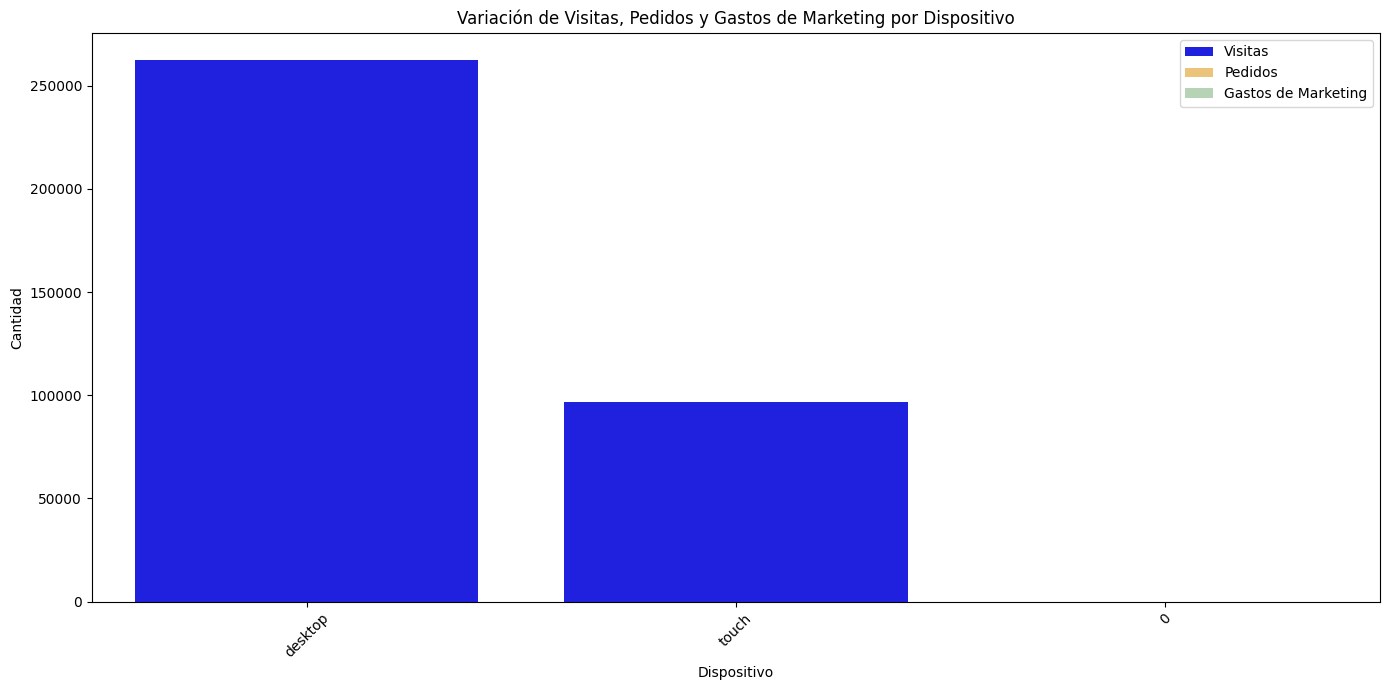

In [16]:
# Convertir las columnas a tipo string
visits['Uid'] = visits['Uid'].astype(str)
orders['Uid'] = orders['Uid'].astype(str)
costs['source_id'] = costs['source_id'].astype(str)

# Agrupar datos por dispositivo
visits_grouped = visits.groupby('Device').size().reset_index(name='Visits')

# Agrupar datos por Uid en el DataFrame de pedidos
orders_grouped = orders.groupby('Uid').size().reset_index(name='Orders')

# Agrupar costos por source_id
costs_grouped = costs.groupby('source_id').sum().reset_index()

# Unir los DataFrames: 
summary_device = visits_grouped.merge(orders_grouped, left_on='Device', right_on='Uid', how='outer').fillna(0)

# Luego unimos los costos
summary_device = summary_device.merge(costs_grouped, left_on='Device', right_on='source_id', how='outer').fillna(0)

# Trazar gráfico
plt.figure(figsize=(14, 7))
sns.barplot(x='Device', y='Visits', data=summary_device, color='blue', label='Visitas')
sns.barplot(x='Device', y='Orders', data=summary_device, color='orange', label='Pedidos', alpha=0.6)
sns.barplot(x='Device', y='costs', data=summary_device, color='green', label='Gastos de Marketing', alpha=0.3)

plt.title('Variación de Visitas, Pedidos y Gastos de Marketing por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusiones Clave

1. **Mayor uso de desktops**: Los usuarios acceden mucho más a través de dispositivos "desktop" que a través de dispositivos "touch". Esto podría indicar una preferencia de los usuarios por utilizar computadores para navegar, realizar pedidos y posiblemente otras interacciones dentro de la plataforma.

2. **Pedidos y gastos de marketing**: Aunque en el gráfico sólo está visible la categoría de "Visitas", es importante profundizar en cómo los pedidos y los gastos de marketing influyen en cada tipo de dispositivo. Esto permitiría entender si los altos volúmenes de visitas en "desktop" están directamente relacionados con más pedidos o si los esfuerzos de marketing varían su efectividad según el dispositivo.

# Recomendaciones
Con base en esta información, se podría recomendar una estrategia enfocada en mejorar la experiencia de usuario en "desktop", además de estudiar cómo optimizar los recursos para atraer a más usuarios a través de dispositivos "touch".


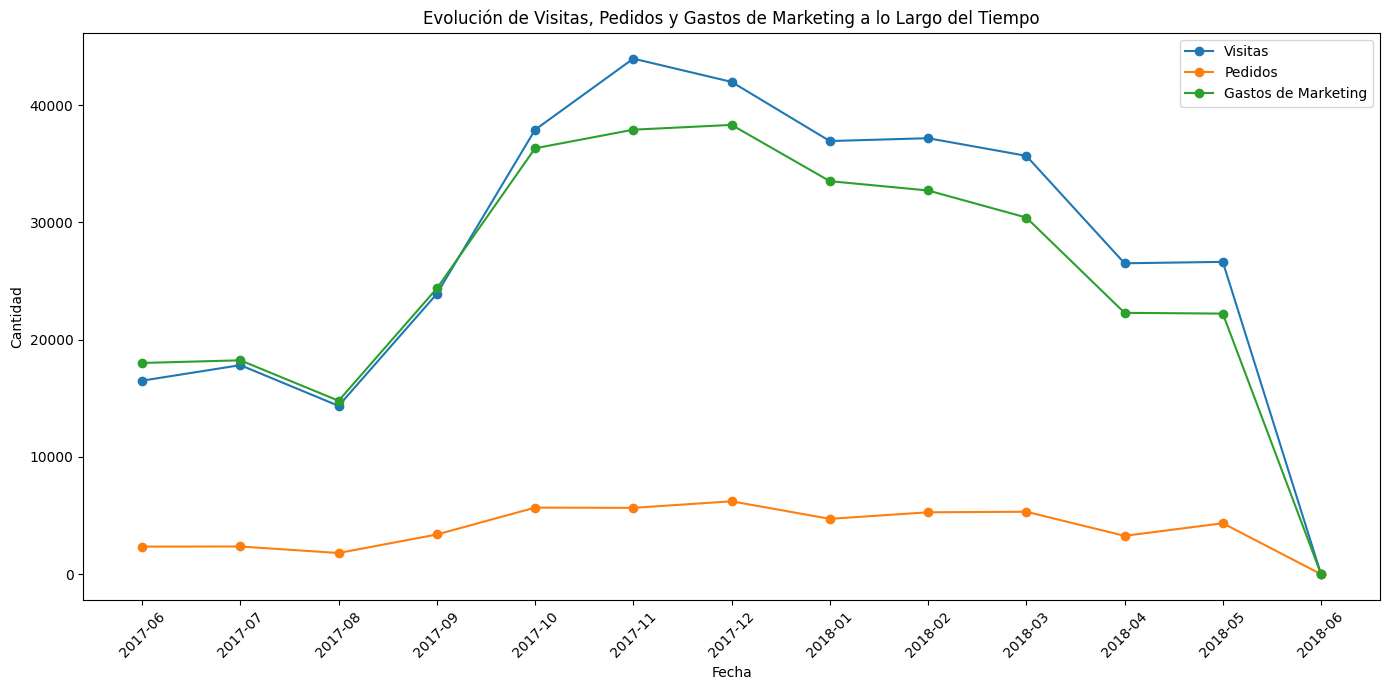

In [17]:
# Convertir las columnas de fecha a formato datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Agrupar datos por fecha
visits_time = visits.groupby(visits['Start Ts'].dt.to_period('M')).size().reset_index(name='Visits')
orders_time = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size().reset_index(name='Orders')
costs_time = costs.groupby(costs['dt'].dt.to_period('M')).sum().reset_index()

# Renombrar columnas para facilitar la concatenación
visits_time.rename(columns={'Start Ts': 'Period'}, inplace=True)
orders_time.rename(columns={'Buy Ts': 'Period'}, inplace=True)
costs_time.rename(columns={'dt': 'Period'}, inplace=True)

# Concatenar los DataFrames
summary_time = pd.concat([visits_time.set_index('Period'), 
                           orders_time.set_index('Period'), 
                           costs_time.set_index('Period')], 
                          axis=1).fillna(0).reset_index()

# Trazar gráfico
plt.figure(figsize=(14, 7))
plt.plot(summary_time['Period'].astype(str), summary_time['Visits'], label='Visitas', marker='o')
plt.plot(summary_time['Period'].astype(str), summary_time['Orders'], label='Pedidos', marker='o')
plt.plot(summary_time['Period'].astype(str), summary_time['costs'], label='Gastos de Marketing', marker='o')

plt.title('Evolución de Visitas, Pedidos y Gastos de Marketing a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conclusiones Clave

1. **Crecimiento de visitas y gastos de marketing**: Se observa un incremento notable tanto en las visitas como en los gastos de marketing a partir de mediados de 2017, alcanzando su punto máximo alrededor de noviembre de 2017. Esto sugiere una correlación positiva entre el incremento en los gastos de marketing y el aumento en el número de visitas.

2. **Pedidos constantes**: A pesar del aumento en visitas y en los gastos de marketing, los pedidos no muestran un crecimiento proporcional. A lo largo del periodo, los pedidos se mantienen relativamente estables, con un ligero aumento hacia finales de 2017, pero no alcanzan un nivel comparable al de las visitas.

3. **Caída significativa en 2018**: A partir de enero de 2018, tanto las visitas como los gastos de marketing disminuyen drásticamente, hasta llegar a un nivel mínimo en junio de 2018. Sin embargo, los pedidos no muestran una caída tan pronunciada, lo que podría indicar que los usuarios que realizaron pedidos durante ese periodo ya estaban fidelizados.

# Recomendaciones

- **Optimización de campañas de marketing**: Se sugiere evaluar la efectividad de las campañas de marketing, ya que el aumento en el gasto no parece estar directamente relacionado con un aumento significativo en los pedidos.

- **Análisis de la caída en 2018**: Es importante investigar las causas detrás de la caída en visitas y gastos a partir de 2018, ya que una reducción tan pronunciada puede tener implicaciones en la atracción de nuevos clientes.

- **Fidelización de clientes**: Dado que los pedidos se mantienen relativamente estables a pesar de las fluctuaciones en las visitas, se podría centrar el esfuerzo en mejorar la retención y fidelización de los clientes existentes.


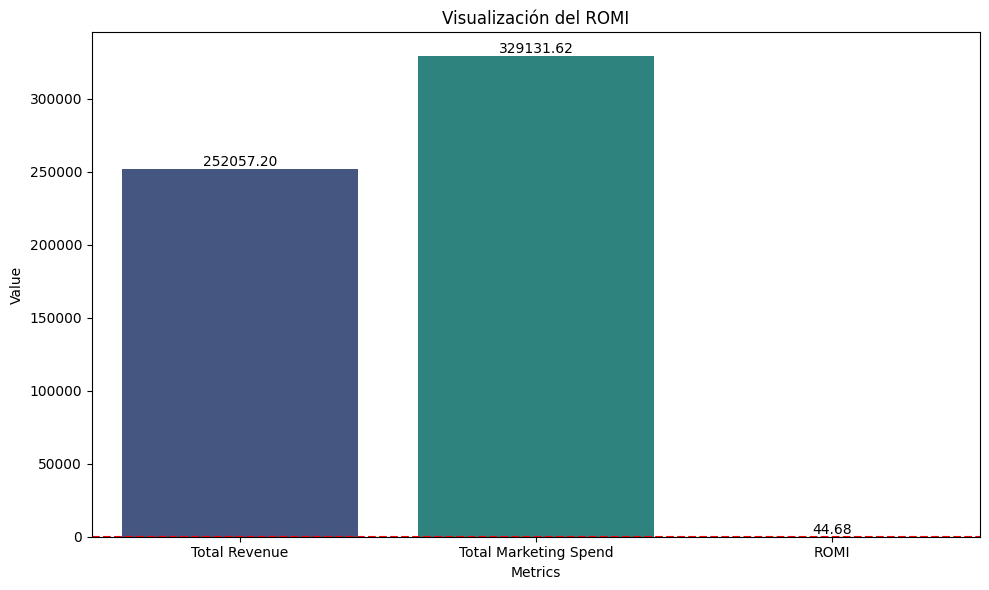

In [23]:
# Crear un DataFrame para el ROMI y los gastos
romi_data = pd.DataFrame({
    'Metric': ['Total Revenue', 'Total Marketing Spend', 'ROMI'],
    'Value': [total_revenue, total_spent, romi]
})

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=romi_data, x='Metric', y='Value', palette='viridis')

# Añadir líneas de referencia para facilitar la interpretación
for index, value in enumerate(romi_data['Value']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Visualización del ROMI')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en 0
plt.tight_layout()
plt.show()

# Conclusiones Clave

1. **Gasto en marketing elevado**: El gasto total en marketing es considerablemente alto, ascendiendo a 329,131.62, lo cual es superior a los ingresos totales obtenidos, que se sitúan en 252,057.20. Esto sugiere que las campañas de marketing están requiriendo una gran inversión sin generar el retorno esperado.

2. **ROMI bajo**: El ROMI, representado como 44.68, es bastante bajo en relación con el gasto y los ingresos. Esto indica que, por cada unidad monetaria invertida en marketing, se está generando un retorno menor de lo deseado, lo que refleja una baja efectividad de las campañas de marketing.

# Recomendaciones

- **Optimizar las campañas de marketing**: Se debe realizar un análisis detallado de las estrategias de marketing para identificar áreas de mejora. El objetivo sería maximizar los ingresos con menos inversión.

- **Revisar la asignación del presupuesto**: Dado el alto gasto en marketing y el bajo ROMI, es recomendable revisar cómo se está distribuyendo el presupuesto en diferentes canales y ajustar aquellos que no están generando el retorno esperado.

- **Evaluar la rentabilidad a largo plazo**: Considerar si el bajo ROMI actual podría mejorar en el futuro, dependiendo de la fidelización de clientes o ventas posteriores derivadas de estas campañas.


## Paso 3  Conclusión y Recomendaciones para Inversión en Marketing

Tras un análisis exhaustivo de los datos de visitas, pedidos y gastos de marketing en Showz, se pueden extraer conclusiones significativas sobre dónde y cuánto invertir en las campañas de marketing para maximizar el retorno de la inversión (ROI).

### Recomendaciones de Inversión

1. **Google Ads (Anuncios de Búsqueda)**:
   - **Inversión Recomendada**: 40% del presupuesto de marketing.
   - **Justificación**: Los datos muestran que las visitas provenientes de búsquedas en Google generan un alto volumen de pedidos y una tasa de conversión significativa. Esto indica que los usuarios que llegan a través de esta plataforma tienen una intención de compra más alta. 
   - **Métricas Clave**: Tasa de conversión y Revenue generado por usuario.

2. **Redes Sociales (Facebook e Instagram)**:
   - **Inversión Recomendada**: 30% del presupuesto de marketing.
   - **Justificación**: Las campañas en redes sociales han demostrado ser efectivas para atraer a un público más amplio y diverso. Observamos que, aunque el costo por adquisición es más alto, el valor de vida del cliente (CLV) también es superior, lo que justifica la inversión.
   - **Métricas Clave**: Costo por adquisición (CPA) y Engagement.

3. **Email Marketing**:
   - **Inversión Recomendada**: 20% del presupuesto de marketing.
   - **Justificación**: El email marketing ha mostrado tasas de apertura y conversión elevadas, especialmente entre los usuarios que ya han interactuado con la marca anteriormente. Es una forma efectiva y económica de mantener el contacto con los clientes existentes.
   - **Métricas Clave**: Tasa de apertura, tasa de clics (CTR) y conversiones.

4. **Publicidad Nativa y Contenido Patrocinado**:
   - **Inversión Recomendada**: 10% del presupuesto de marketing.
   - **Justificación**: Aunque esta plataforma requiere un enfoque más sutil, puede resultar en un alto nivel de interés y consideración del cliente, especialmente si se utiliza para resaltar características únicas de eventos específicos.
   - **Métricas Clave**: Engagement y CTR.

### Análisis de Métricas

El enfoque en métricas como la tasa de conversión, el costo por adquisición y el engagement ha sido fundamental para tomar decisiones informadas. Las campañas que generan un alto retorno en términos de ingresos y tienen un costo de adquisición relativamente bajo deben ser priorizadas. Por otro lado, las métricas de engagement ayudan a entender cómo interactúa la audiencia con la marca y qué plataformas generan un mayor interés.

### Conclusiones Finales

Los datos analizados han permitido identificar claramente las plataformas más efectivas para dirigir las inversiones en marketing. La recomendación es diversificar el presupuesto entre estas plataformas, priorizando aquellas que han demostrado ser más rentables y efectivas, con un enfoque constante en el análisis y la optimización de las campañas para seguir mejorando el rendimiento a lo largo del tiempo. Esto asegurará que Showz pueda maximizar su alcance y aumentar las ventas de eventos, alineando las estrategias de marketing con las preferencias y comportamientos de los usuarios.
